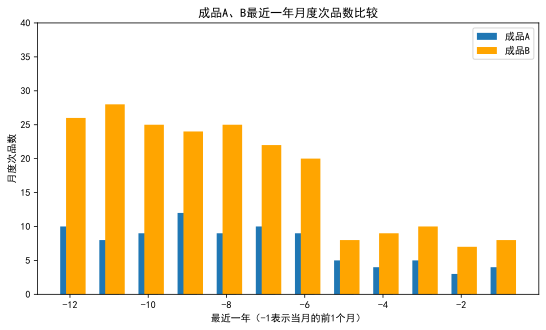

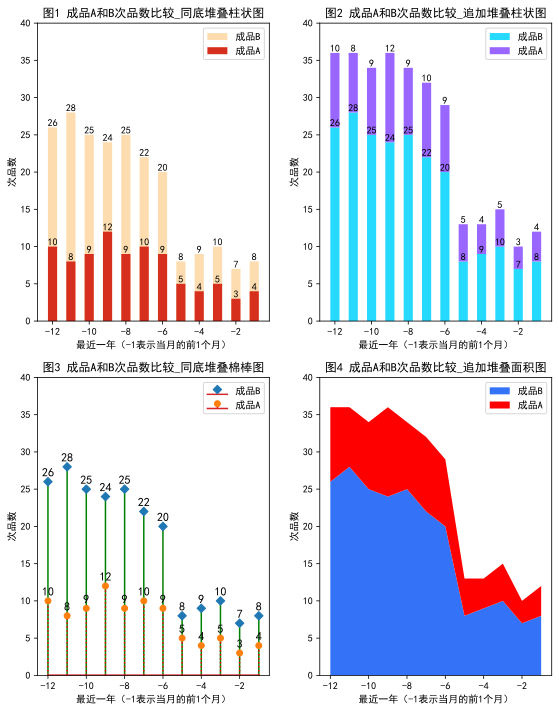

In [28]:
#提高图片显示的分辨率，如果无此语句，图片显示不清晰
%config InlineBackend.figure_format = 'svg' 

#导入matplotlib的子库pyplot并命名为plt
import matplotlib.pyplot as plt 
import numpy as np

#使图形中的中文正常编码显示
plt.rcParams['font.sans-serif'] = ['SimHei']
#使坐标轴刻度正常显示负号
plt.rcParams['axes.unicode_minus'] = False

#模拟生产数据
period = range(-12,0)
compA_defectNum = [10, 8, 9, 12, 9, 10, 9, 5, 4, 5, 3, 4]
compB_defectNum = [26, 28, 25, 24, 25, 22, 20, 8, 9, 10, 7, 8]
#dataNum = [compA_defectNum, compB_defectNum]
#labels = ['成品A', '成品B']
dataNum = [compB_defectNum, compA_defectNum]
labels = ['成品B', '成品A']



#微偏柱状图
fig = plt.figure(figsize=(9,5), dpi=90)
ax = fig.add_subplot(1,1,1)
#第一个坐标轴和图，季度次品数
ax.set_ylabel('月度次品数')
ax.set_xlabel('最近一年（-1表示当月的前1个月）')
plt.bar(period, compA_defectNum, width=0.5, label='成品A')
shift = 0.15 
plt.bar([i+shift for i in period], compB_defectNum, width=0.5, color='orange', label='成品B')
plt.ylim(0,40)
plt.title('成品A、B最近一年月度次品数比较')
ax.legend()
plt.savefig('003_1_data_StaggerBars.png')  


#多种堆叠图：同底/追加堆叠柱状图、同底堆叠棉棒图、追加堆叠面积图
fig = plt.figure(figsize=(8,10), dpi=90) 
#图1：堆叠柱状图，两种成品的柱状图纵坐标均从0起
ax = fig.add_subplot(2,2,1)#设置第一个子图
n_rows = len(dataNum)
bar_width = 0.5
y_offset = np.zeros(len(period))
colors = plt.cm.OrRd(np.linspace(0.2, 0.75, 2))#暖色系
for row in range(n_rows):
    plot = plt.bar(period, dataNum[row], bar_width, bottom=y_offset, color=colors[row], label=labels[row])
    
    i=0
    for rect in plot:
        ax.text(rect.get_x() + rect.get_width()/2, dataNum[row][i],'%d' % int(dataNum[row][i]), 
                ha='center', va='bottom')
        i = i+1
    
ax.legend()#显示题注，可通过loc参数设置题注的位置，可参考上一篇帖子    
ax.set_title('图1 成品A和B次品数比较_同底堆叠柱状图')
ax.set_ylabel('次品数')
ax.set_xlabel('最近一年（-1表示当月的前1个月）')
plt.ylim(0,40)


#图2：堆叠柱状图，第二种成品的柱状图从第一种成品的数量处画起
ax = fig.add_subplot(2,2,2)#设置第二个子图
n_rows = len(dataNum)
bar_width = 0.5
y_offset = np.zeros(len(period))
colors = plt.cm.cool(np.linspace(0.15, 0.6, 2))#冷色系
for row in range(n_rows):
    plot = plt.bar(period, dataNum[row], bar_width, bottom=y_offset, color=colors[row], label=labels[row])
    y_offset = y_offset + dataNum[row]
    i=0
    for rect in plot:
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i],'%d' % int(dataNum[row][i]), 
                ha='center', va='bottom')
        i = i+1
ax.legend()#显示题注，可通过loc参数设置题注的位置，可参考上一篇帖子    
ax.set_title('图2 成品A和B次品数比较_追加堆叠柱状图')
ax.set_ylabel('次品数')
ax.set_xlabel('最近一年（-1表示当月的前1个月）')
plt.ylim(0,40)


#图3：堆叠棉棒图
ax = fig.add_subplot(2,2,3)#设置第四个子图
linestyle = ['g-', 'r:']
markerstyle = ['D', 'o']
for row in range(n_rows):
    markerline, stemlines, baseline = ax.stem(period, dataNum[row], linefmt=linestyle[row],
                                          markerfmt=markerstyle[row], label=labels[row], use_line_collection=True)
    for x, y in zip(period, dataNum[row]):
        ax.text(x, y + 0.5, s='{}'.format(y), ha='center', va='bottom', fontsize=12)
ax.set_title('图3 成品A和B次品数比较_同底堆叠棉棒图')
ax.set_ylabel('次品数')
ax.set_xlabel('最近一年（-1表示当月的前1个月）')
ax.legend()#显示题注，可通过loc参数设置题注的位置，可参考上一篇帖子
plt.ylim(0,40)


#图4：堆叠面积图
ax = fig.add_subplot(2,2,4)#设置第三个子图
colors = plt.cm.rainbow(np.linspace(0.15, 1, 2))#彩虹色系
ax.stackplot(period, dataNum, labels = labels, colors = colors)
ax.set_ylabel('次品数')
ax.set_xlabel('最近一年（-1表示当月的前1个月）')
ax.legend()#显示题注，可通过loc参数设置题注的位置，可参考上一篇帖子
ax.set_title('图4 成品A和B次品数比较_追加堆叠面积图')
plt.ylim(0,40)
#plt.subplot(2,2,4)    
fig.tight_layout()#自动调整子图位置来适合图形区域

#保存第二个图片 #注：savefig要在show前面，否则保存的是空白的图片
plt.savefig('003_2_data_StackedChart_Summary.png')  
plt.show()